# Creating Training Sets

## Analysing the Kaggle Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<AxesSubplot:xlabel='Embarked', ylabel='count'>

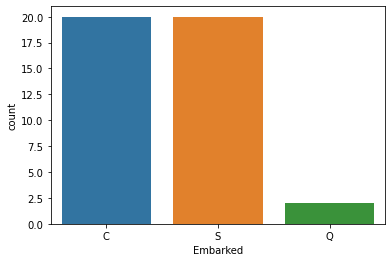

In [9]:
check = train[(train['Fare']>=75) & (train['Fare']<=95)].sort_values(by=['Fare'])
sns.countplot(data=check, x='Embarked')

### Dropping 3 columns

In [10]:
train_val = train.drop(columns=['Ticket','PassengerId','Name'])

In [43]:
train_val.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,NaN,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,NaN,S


### One-Hot Encoding the Sex column

In [12]:
train_val['Sex'] = train_val['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [44]:
train_val['Sex'].value_counts()

1    577
0    312
Name: Sex, dtype: int64

### Dropping 2 nan values of Embarked col

In [14]:
train_val = train_val.drop(train_val[train_val['Embarked'].isnull()].index)
train_val.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,NaN,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,NaN,S


In [45]:
train_val.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

### Creating Embarked dummy vars

In [16]:
train_check = pd.get_dummies(train_val['Embarked'],drop_first=True)

In [17]:
final_df = pd.concat([train_val, train_check],axis=1)

#### Filling Age missing values with average age from Class

In [23]:
fill_age = final_df[final_df['Age'].notnull()]
fill_age = fill_age[['Age','Pclass']]

In [24]:
fill_age = fill_age.groupby(['Pclass']).mean()
fill_age

,Age
Pclass,
1,38.105543
2,29.877630
3,25.140620


In [25]:
np_age = fill_age.to_numpy()
np_age[0][0]

38.10554347826087

In [26]:
def change_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return np_age[0][0]

        elif Pclass == 2:
            return np_age[1][0]

        else:
            return np_age[2][0]

    else:
        return Age

In [27]:
final_df['Age'] = final_df[['Age','Pclass']].apply(change_age,axis=1)
final_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Q,S
0,0,3,1,22.0,1,0,7.2500,NaN,S,0,1
1,1,1,0,38.0,1,0,71.2833,C85,C,0,0
2,1,3,0,26.0,0,0,7.9250,NaN,S,0,1
3,1,1,0,35.0,1,0,53.1000,C123,S,0,1
4,0,3,1,35.0,0,0,8.0500,NaN,S,0,1


In [28]:
final_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
Q             0
S             0
dtype: int64

#### Dropping Cabin and Embarked

In [30]:
final_df = final_df.drop(['Cabin','Embarked'],axis=1)
final_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


#### Feature Engineering Age * Fare

In [31]:
final_df['AgeFare'] = final_df['Age'] * final_df['Fare']

<AxesSubplot:xlabel='AgeFare', ylabel='Survived'>

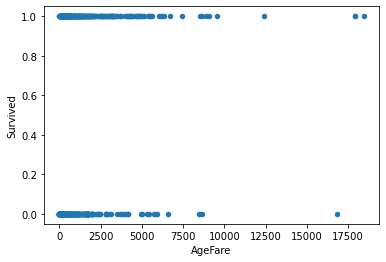

In [34]:
df_viz = final_df[['AgeFare','Survived']]
df_viz.plot(x='AgeFare', y='Survived', kind='scatter')

In [36]:
final_df[['AgeFare','Survived']].groupby('Survived').sum()

,AgeFare
Survived,
0,384451.179755
1,518474.325350


#### Featuring Siblings + Parents/Childs in single column

In [40]:
final_df['SibPar'] = final_df['SibSp'] + final_df['Parch']
final_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,AgeFare,SibPar
0,0,3,1,22.0,1,0,7.2500,0,1,159.5000,1
1,1,1,0,38.0,1,0,71.2833,0,0,2708.7654,1
2,1,3,0,26.0,0,0,7.9250,0,1,206.0500,0
3,1,1,0,35.0,1,0,53.1000,0,1,1858.5000,1
4,0,3,1,35.0,0,0,8.0500,0,1,281.7500,0


### Training Set 1

In [42]:
final_df.to_csv('TrainSet1.csv', index=False)

## Creating Training Set 2

#### One-hot encoding the different variables to run on Decision Trees / XGBoost

In [46]:
df_check = pd.get_dummies(final_df['Parch'],drop_first=True,prefix='Parch')
final_df = pd.concat([final_df, df_check],axis=1)
final_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,AgeFare,SibPar,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,3,1,22.0,1,0,7.2500,0,1,159.5000,1,0,0,0,0,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2708.7654,1,0,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,1,206.0500,0,0,0,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,0,1,1858.5000,1,0,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,0,1,281.7500,0,0,0,0,0,0,0


In [47]:
df_check = pd.get_dummies(final_df['SibSp'],drop_first=True,prefix='SibSp')
final_df = pd.concat([final_df, df_check],axis=1)
final_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,AgeFare,...,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,0,3,1,22.0,1,0,7.2500,0,1,159.5000,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2708.7654,...,0,0,0,0,1,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,1,206.0500,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,0,1,1858.5000,...,0,0,0,0,1,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,0,1,281.7500,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df_check = pd.get_dummies(final_df['Pclass'],drop_first=True,prefix='Pclass')
final_df = pd.concat([final_df, df_check],axis=1)
final_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,AgeFare,...,Parch_5,Parch_6,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_2,Pclass_3
0,0,3,1,22.0,1,0,7.2500,0,1,159.5000,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,0,0,2708.7654,...,0,0,1,0,0,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,1,206.0500,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,1,1858.5000,...,0,0,1,0,0,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,0,1,281.7500,...,0,0,0,0,0,0,0,0,0,1


In [49]:
final_df = final_df.drop([('SibSp')],axis=1)
final_df = final_df.drop([('Parch')],axis=1)
final_df = final_df.drop([('Pclass')],axis=1)
final_df.head()

,Survived,Sex,Age,Fare,Q,S,AgeFare,SibPar,Parch_1,Parch_2,...,Parch_5,Parch_6,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_2,Pclass_3
0,0,1,22.0,7.2500,0,1,159.5000,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,38.0,71.2833,0,0,2708.7654,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,26.0,7.9250,0,1,206.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,35.0,53.1000,0,1,1858.5000,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,35.0,8.0500,0,1,281.7500,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### One-Hot Encoding Age (used 3 year intervals ~ kinda overkill)

In [50]:
in_3 = np.arange(start=0, stop=100, step=3)
def age_class(age):
    #get age index in 3 by 3 array
    ind = int(age // 3)
    return in_3[ind]

final_df['Age_cluster'] = final_df['Age'].apply(age_class)
df_check = pd.get_dummies(final_df['Age_cluster'],drop_first=True,prefix='Age')
final_df = pd.concat([final_df, df_check],axis=1)
final_df = final_df.drop(['Age'],axis=1)

### Mostly the same with Fare

In [51]:
in_25 = np.arange(start=final_df['Fare'].min(), stop=final_df['Fare'].max(), step=25)
def fare_class(fare):
    #get fare index in 25 ++ array
    ind = int(fare // 25)
    return in_25[ind]

final_df['Fare_cluster'] = final_df['Fare'].apply(fare_class)
df_check = pd.get_dummies(final_df['Fare_cluster'],drop_first=True,prefix='Fare')
final_df = pd.concat([final_df, df_check],axis=1)
final_df = final_df.drop(['Fare'],axis=1)

### Mostly the same with Age Fare

In [52]:
in_1 = np.arange(start=0, stop=2500, step=150)
in_2 = np.arange(start=2500, stop=7500, step=500)
in_3 = np.arange(start=7500, stop=final_df['AgeFare'].max(), step=2500)
in_agefare = np.concatenate((in_1,in_2,in_3),axis=None)
def agefare_class(Agefare):
    #get fare index in 25 ++ array
    if Agefare <= 2500: 
        ind = int(Agefare // 150)
    elif Agefare <= 7500:
        ind = int(Agefare // 500)
    else:
        ind = int(Agefare // 2500)
    return in_agefare[ind]

final_df['AgeFare_cluster'] = final_df['AgeFare'].apply(agefare_class)
df_check = pd.get_dummies(final_df['AgeFare_cluster'],drop_first=True,prefix='Age_Fare')
final_df = pd.concat([final_df, df_check],axis=1)
final_df = final_df.drop(['AgeFare'],axis=1)

In [53]:
final_df.head()

,Survived,Sex,Q,S,SibPar,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,...,Age_Fare_1050.0,Age_Fare_1200.0,Age_Fare_1350.0,Age_Fare_1500.0,Age_Fare_1650.0,Age_Fare_1800.0,Age_Fare_1950.0,Age_Fare_2100.0,Age_Fare_2250.0,Age_Fare_2400.0
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#final_df = final_df.drop(['Age_cluster', 'Fare_cluster', 'Age_cluster'],axis=1)
final_df = final_df.drop(['AgeFare_cluster'],axis=1)
final_df.columns

Index(['Survived', 'Sex', 'Q', 'S', 'SibPar', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_5', 'SibSp_8', 'Pclass_2', 'Pclass_3', 'Age_3',
       'Age_6', 'Age_9', 'Age_12', 'Age_15', 'Age_18', 'Age_21', 'Age_24',
       'Age_27', 'Age_30', 'Age_33', 'Age_36', 'Age_39', 'Age_42', 'Age_45',
       'Age_48', 'Age_51', 'Age_54', 'Age_57', 'Age_60', 'Age_63', 'Age_66',
       'Age_69', 'Age_72', 'Age_78', 'Fare_25.0', 'Fare_50.0', 'Fare_75.0',
       'Fare_100.0', 'Fare_125.0', 'Fare_150.0', 'Fare_200.0', 'Fare_225.0',
       'Fare_250.0', 'Fare_500.0', 'Age_Fare_150.0', 'Age_Fare_300.0',
       'Age_Fare_450.0', 'Age_Fare_600.0', 'Age_Fare_750.0', 'Age_Fare_900.0',
       'Age_Fare_1050.0', 'Age_Fare_1200.0', 'Age_Fare_1350.0',
       'Age_Fare_1500.0', 'Age_Fare_1650.0', 'Age_Fare_1800.0',
       'Age_Fare_1950.0', 'Age_Fare_2100.0', 'Age_Fare_2250.0',
       'Age_Fare_2400.0'],
      dtype='object')

In [59]:
final_df.head()

,Survived,Sex,Q,S,SibPar,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,...,Age_Fare_1050.0,Age_Fare_1200.0,Age_Fare_1350.0,Age_Fare_1500.0,Age_Fare_1650.0,Age_Fare_1800.0,Age_Fare_1950.0,Age_Fare_2100.0,Age_Fare_2250.0,Age_Fare_2400.0
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Training Set 2

In [61]:
final_df.to_csv('TrainSet2.csv', index=False)